<a href="https://colab.research.google.com/github/unahel9-beep/Human_right_incentives_fundraising-_data/blob/main/fundraising_analysis_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Raised: 21120 ETB
Fundraising Goal: 50000 ETB
Progress: 42.24%


/tmp/ipython-input-2096108799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(df["Name"], rotation=90)


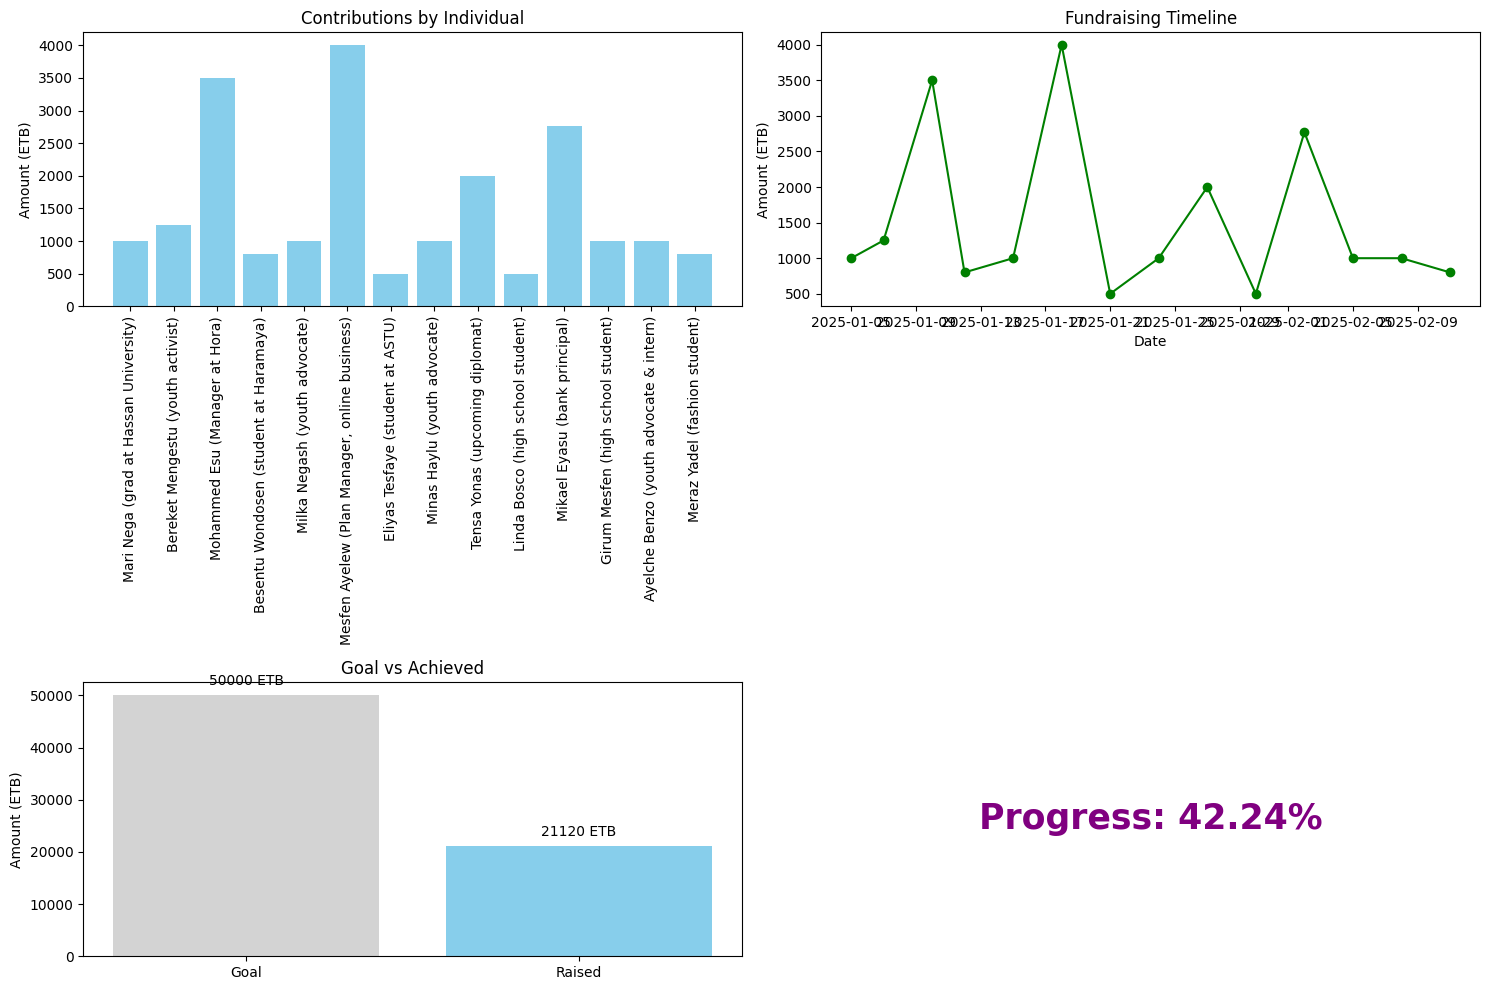

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/content/fundraising_data.csv")

# Total raised and goal
total_raised = df["Amount_ETB"].sum()
goal_amount = 50000  # Updated goal
progress_percentage = (total_raised / goal_amount) * 100

# Display key info
print(f"Total Raised: {total_raised} ETB")
print(f"Fundraising Goal: {goal_amount} ETB")
print(f"Progress: {progress_percentage:.2f}%")

# Convert dates
df["Date"] = pd.to_datetime(df["Date"])
df_sorted = df.sort_values("Date")

# Create dashboard figure
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Bar chart of contributions
axs[0,0].bar(df["Name"], df["Amount_ETB"], color="skyblue")
axs[0,0].set_xticklabels(df["Name"], rotation=90)
axs[0,0].set_ylabel("Amount (ETB)")
axs[0,0].set_title("Contributions by Individual")

# Timeline chart
axs[0,1].plot(df_sorted["Date"], df_sorted["Amount_ETB"], marker="o", color="green")
axs[0,1].set_xlabel("Date")
axs[0,1].set_ylabel("Amount (ETB)")
axs[0,1].set_title("Fundraising Timeline")

# Goal vs Achieved
axs[1,0].bar(["Goal", "Raised"], [goal_amount, total_raised], color=["lightgray", "skyblue"])
axs[1,0].set_ylabel("Amount (ETB)")
axs[1,0].set_title("Goal vs Achieved")
for i, val in enumerate([goal_amount, total_raised]):
    axs[1,0].text(i, val + 2000, f"{val} ETB", ha='center', fontsize=10)

# Progress Percentage
axs[1,1].axis('off')
axs[1,1].text(0.5, 0.5, f"Progress: {progress_percentage:.2f}%", fontsize=25,
               ha='center', va='center', weight='bold', color="purple")

plt.tight_layout()
plt.show()